 ## KNN - Vizinhos mais próximos

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


def show_pil_image(i):
    i = np.resize((i/16 * 255),(8,8))
    im = Image.fromarray(i)
    if im.mode != 'L':
        im = im.convert('L')
    display(im)

def show_big_image(i):
    i = np.resize((i/16 * 255),(8,8))
    plt.gray()
    plt.matshow(i)
    plt.show()

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()

ss = StandardScaler(with_std=False)
X = ss.fit_transform(digits['data'])

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(algorithm='ball_tree', n_neighbors=25, leaf_size=30)
knn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [ ]:
import numpy as np

X_noise = X[50] + np.random.normal(0.0, 1.5, size=(64, ))

<Figure size 432x288 with 0 Axes>

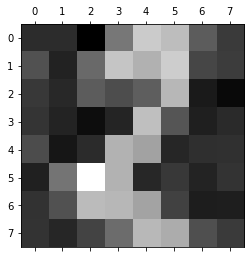

In [ ]:
#show_big_image( ss.inverse_transform([X[520]])[0])
show_big_image( ss.inverse_transform([X_noise])[0])

In [ ]:
distances, neighbors = knn.kneighbors(X_noise.reshape(1, -1), return_distance=True)

print(distances[0])

[12.36848096 20.62059515 22.33213586 24.81816776 27.50699402 29.4396489
 30.20746925 30.41061822 30.54146658 31.65800862 32.00074712 32.29461518
 33.30529005 33.34120177 34.3875961  34.42174646 34.48499165 34.54896678
 34.61237407 34.73424387 34.87232324 35.22962244 35.43850941 35.45202266
 35.50763489]


<Figure size 432x288 with 0 Axes>

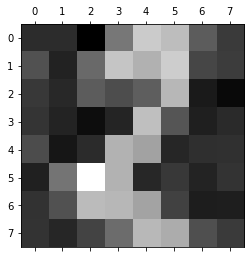

--------------------------
Distância: 12.368480964443584


<Figure size 432x288 with 0 Axes>

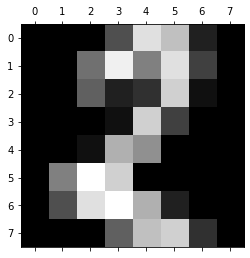

--------------------------
Distância: 20.62059514661757


<Figure size 432x288 with 0 Axes>

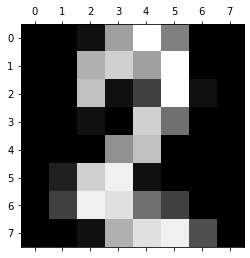

--------------------------
Distância: 22.332135860798573


<Figure size 432x288 with 0 Axes>

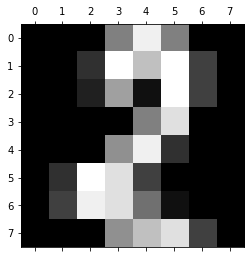

--------------------------
Distância: 24.818167755710302


<Figure size 432x288 with 0 Axes>

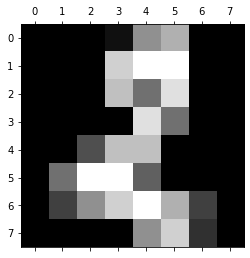

--------------------------
Distância: 27.506994017463263


<Figure size 432x288 with 0 Axes>

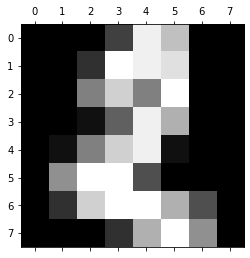

--------------------------
Distância: 29.43964890379191


<Figure size 432x288 with 0 Axes>

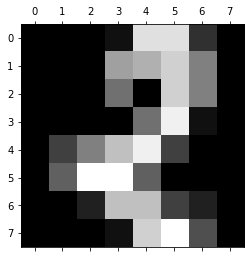

--------------------------
Distância: 30.207469252557164


<Figure size 432x288 with 0 Axes>

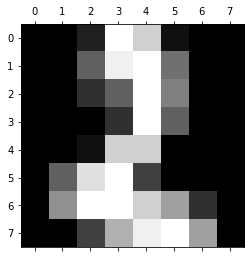

--------------------------
Distância: 30.410618219364988


<Figure size 432x288 with 0 Axes>

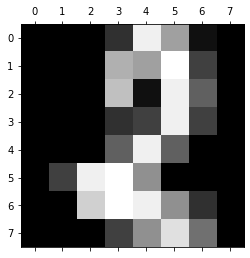

--------------------------
Distância: 30.54146658175993


<Figure size 432x288 with 0 Axes>

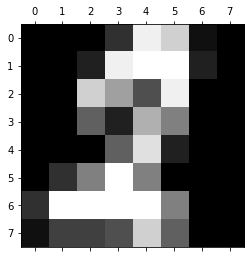

--------------------------
Distância: 31.658008620565063


<Figure size 432x288 with 0 Axes>

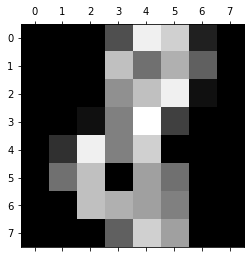

--------------------------
Distância: 32.00074712151257


<Figure size 432x288 with 0 Axes>

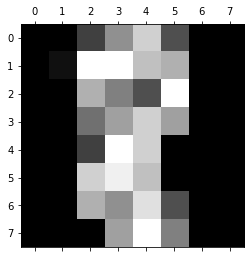

--------------------------
Distância: 32.29461517611974


<Figure size 432x288 with 0 Axes>

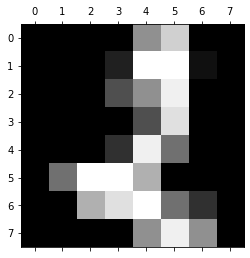

--------------------------
Distância: 33.30529005066315


<Figure size 432x288 with 0 Axes>

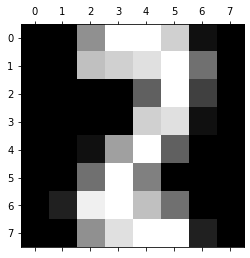

--------------------------
Distância: 33.341201769788


<Figure size 432x288 with 0 Axes>

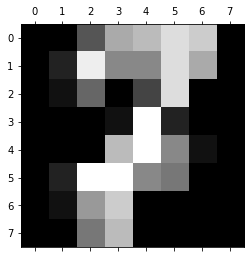

--------------------------
Distância: 34.38759610185731


<Figure size 432x288 with 0 Axes>

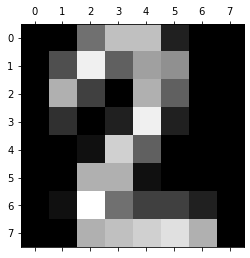

--------------------------
Distância: 34.42174646201695


<Figure size 432x288 with 0 Axes>

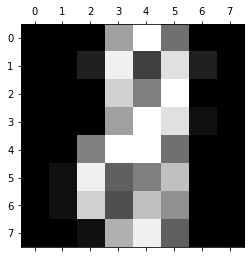

--------------------------
Distância: 34.48499164837141


<Figure size 432x288 with 0 Axes>

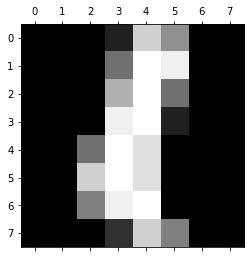

--------------------------
Distância: 34.54896677978357


<Figure size 432x288 with 0 Axes>

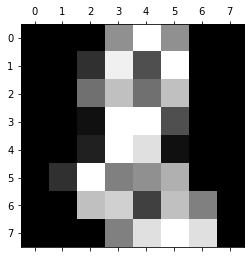

--------------------------
Distância: 34.612374069362346


<Figure size 432x288 with 0 Axes>

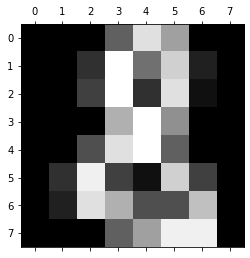

--------------------------
Distância: 34.734243873811


<Figure size 432x288 with 0 Axes>

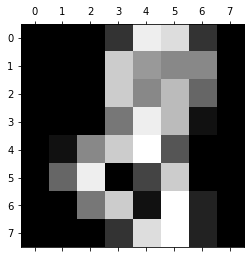

--------------------------
Distância: 34.87232323551054


<Figure size 432x288 with 0 Axes>

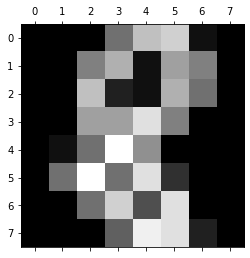

--------------------------
Distância: 35.22962244329139


<Figure size 432x288 with 0 Axes>

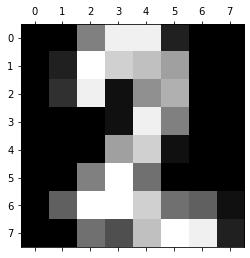

--------------------------
Distância: 35.43850941136449


<Figure size 432x288 with 0 Axes>

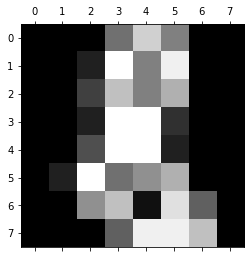

--------------------------
Distância: 35.4520226592975


<Figure size 432x288 with 0 Axes>

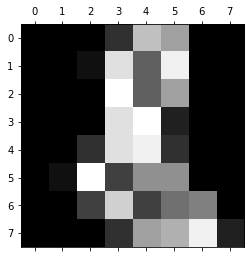

--------------------------
Distância: 35.507634894484724


<Figure size 432x288 with 0 Axes>

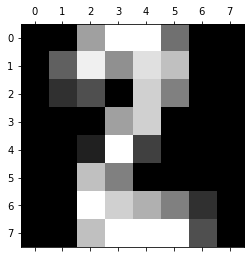

In [ ]:
noise_img = ss.inverse_transform([X_noise])[0]
show_big_image(noise_img)

#dig_img = ss.inverse_transform([[X[neighbors[0][0]]][0]])[0]
#show_big_image(dig_img)

for i in range(len(neighbors[0])):
    dig_img = ss.inverse_transform([[X[neighbors[0][i]]][0]])[0]
    print("--------------------------")
    print("Distância:", distances[0][i])
    show_big_image(dig_img)

In [ ]:
neighbors[0]

array([  50,  116,  115,   57,    2,   54,  113,   51,  502,  524,  114,
         75,  860, 1072,  369, 1619,  336,  556,  592,  638,  630, 1041,
        612,  639,  340], dtype=int64)

## K-means

In [1]:
from sklearn.datasets import make_blobs

nb_samples = 1000
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=2.5, random_state=1000)

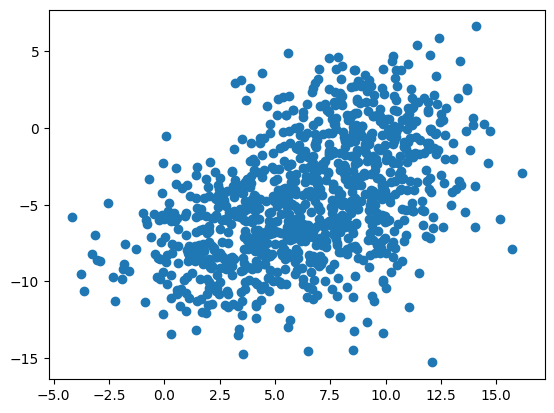

In [2]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,init='k-means++')
km.fit(X)

print(km.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 4.25845345 -7.42861101]
 [ 9.12736729 -1.33720013]]


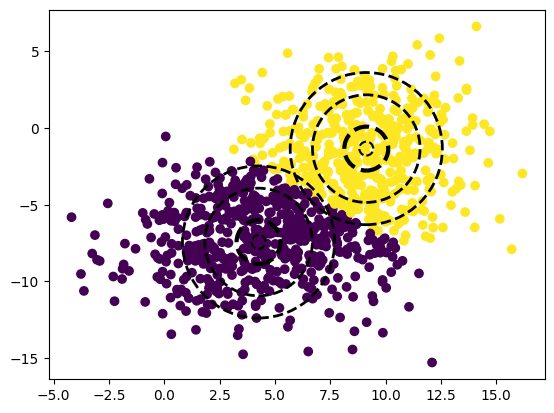

In [4]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=12000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=6000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=1000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=3)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=1.5)

plt.show()

In [5]:
from sklearn.datasets import make_circles

nb_samples = 1000
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

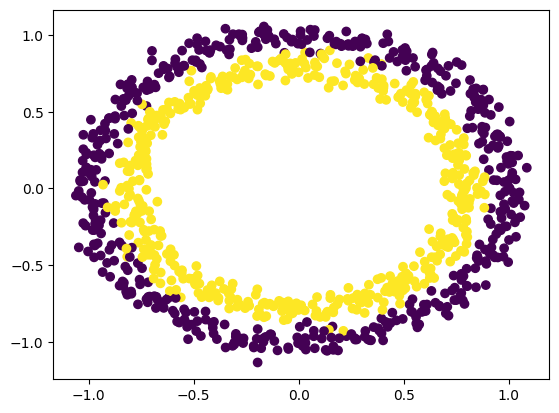

In [6]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=Y)
plt.show()

In [7]:
km = KMeans(n_clusters=2)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

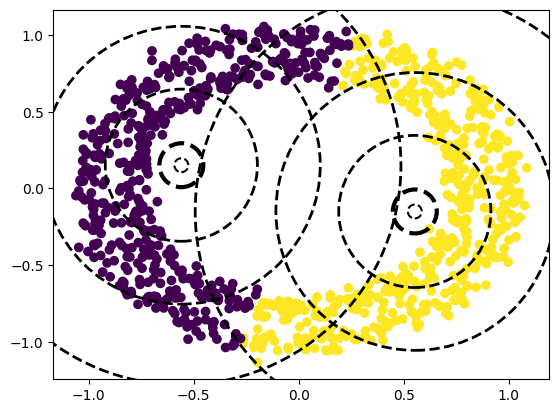

In [9]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=40000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=12000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=2)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=1000, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=3)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, facecolors='none', edgecolors='black',
            linestyle='--', linewidths=1.5)


plt.show()

In [10]:
import numpy as np

from scipy.spatial.distance import pdist

true_distances = pdist(X[Y == 0], metric='euclidean')
print(np.mean(true_distances))



Y_pred = km.predict(X)
sampled_X = np.random.choice(X[Y_pred == 0, 0], replace=False, size=300).astype(np.int32)

distances = pdist(X[sampled_X], metric='euclidean')

print(np.mean(distances))


1.2821918112772654
0.15060747048249126


### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

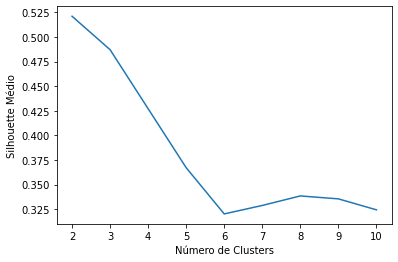

In [ ]:
plt_aics = plt.figure()
plt.plot(nb_clusters,avg_silhouettes)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Médio")
plt.show()

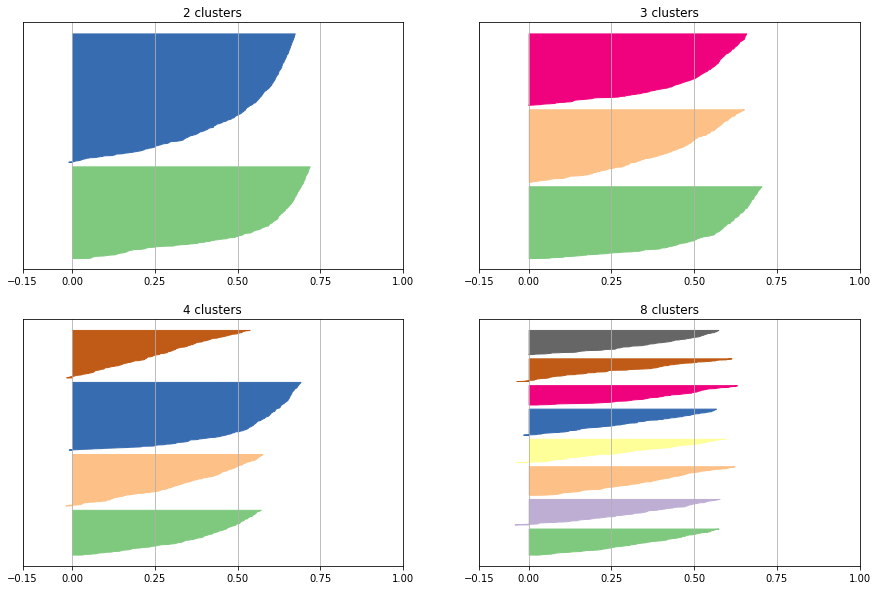

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

nb_clusters = [2, 3, 4, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)

    silhouette_values = silhouette_samples(X, Y)

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    ax[mapping[i]].grid()
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0,
                                     ct_values, facecolor=color, edgecolor=color)
        y_lower = y_upper + 20

## Hierarchical Clustering

In [ ]:
from sklearn.datasets import make_blobs

nb_samples = 25
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5)

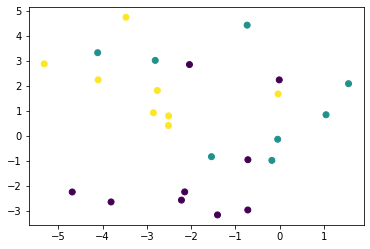

In [ ]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

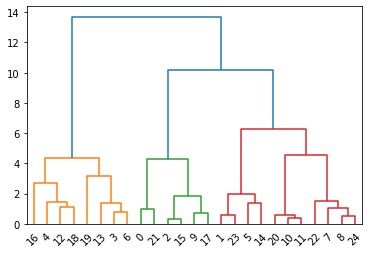

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='ward') #método de linkagem
Xd = dendrogram(Xl)

In [ ]:
from sklearn.datasets import make_blobs

nb_samples = 3000
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=8, cluster_std=2.0)

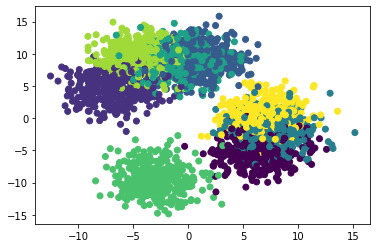

In [ ]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

ac = AgglomerativeClustering(n_clusters=8, linkage='complete')
Y_pred = ac.fit_predict(X)

print('Silhouette score (Complete): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Complete): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Complete): 0.246
Adjusted Rand score (Complete): 0.446


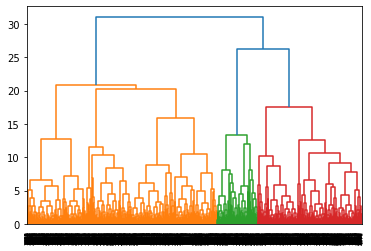

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='complete')
Xd = dendrogram(Xl)

In [ ]:
ac = AgglomerativeClustering(n_clusters=8, linkage='average')
Y_pred = ac.fit_predict(X)

print('Silhouette score (Average): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Average): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Average): 0.362
Adjusted Rand score (Average): 0.549


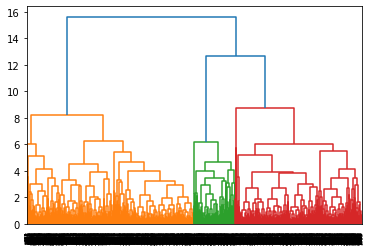

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='average')
Xd = dendrogram(Xl)

In [ ]:
ac = AgglomerativeClustering(n_clusters=8)
Y_pred = ac.fit_predict(X)

print('Silhouette score (Ward): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Ward): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Ward): 0.335
Adjusted Rand score (Ward): 0.503


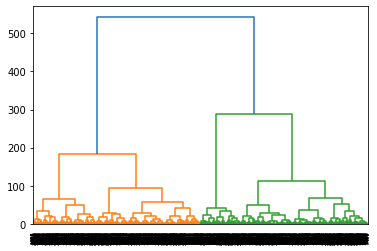

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='ward')
Xd = dendrogram(Xl)

## DBSCAN

In [ ]:
from sklearn.datasets import make_moons

nb_samples = 1000
moon_X, moon_Y = make_moons(n_samples=nb_samples, noise=0.05)

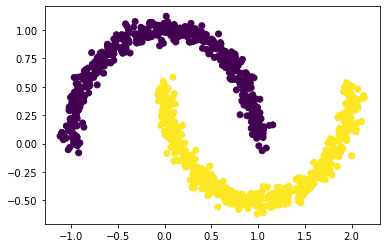

In [ ]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1], c=moon_Y)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.1)
moon_Y_db = dbs.fit_predict(moon_X)

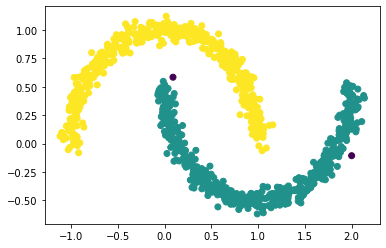

In [ ]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1],c=moon_Y_db)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.05)
moon_Y_db = dbs.fit_predict(moon_X)

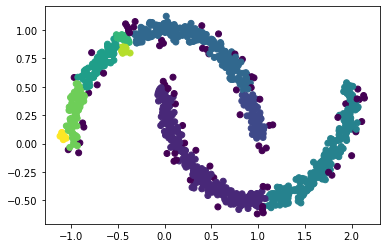

In [ ]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1],c=moon_Y_db)
plt.show()